In [922]:
import sys
sys.path.insert(-1, "/home/jhongda/Research/Synapes/script")


In [931]:
import AgExtract.data as data
import AgExtract.utilities as utl
import matplotlib.pyplot as plt
from os import listdir
import numpy as np



def make_plot(sci, seg=False, **keyargs):
    
    if seg:
        prm1 = sci.get("prms")
        prm1_set = list(set(prm1))
        prm2_set = prm1_set
        nag = sci.get("nag", True)
        ret = np.ones((len(prm1_set), len(prm1_set)))*np.nan
        for i in range(len(prm1_set)):
            for j in range(len(prm1_set)):
                ret[i, j] = (nag[prm1.index(prm1_set[i])] + nag[prm1.index(prm1_set[j])])/2
        
    else:
        prm1 = sci.get("prms", True)
        prm2 = sci.get("prms2", True)

        prm1_set = list(set(prm1))
        prm2_set = list(set(prm2))
        length = len(list(set(prm1)))
        nag = ( sci.get("nag", True) + sci.get("nag_antag", True) ) 
    
        ret = np.ones((len(prm1_set), len(prm2_set)))*np.nan
        for ni, p1i, p2i in zip(nag, prm1, prm2):
            ret[prm1_set.index(p1i), prm2_set.index(p2i)] = ni
    fig, ax=plt.subplots(figsize=(3,2.5), dpi=200)
    hmap = plt.pcolor(prm2_set, prm1_set,  ret, **keyargs)
    plt.colorbar(hmap)
    #plt.show()
    return ax
    
def plot_qty(sci, qty="mmax", **keyargs):
    prm1 = sci.get("prms", True)
    prm2 = sci.get("prms2", True)
    
    prm1_set = list(set(prm1))
    prm2_set = list(set(prm2))
    length = len(list(set(prm1)))
    mmax = sci.get(qty, True)
    
    ret = np.ones((len(prm1_set), len(prm2_set)))*np.nan
    for ni, p1i, p2i in zip(mmax, prm1, prm2):
        ret[prm1_set.index(p1i), prm2_set.index(p2i)] = ni
    fig, ax=plt.subplots(figsize=(3,2.5), dpi=100)
    hmap = plt.pcolor(prm2_set, prm1_set,  ret, **keyargs)
    plt.colorbar(hmap)
    plt.show()
    
    
def plot_seg_qty(sci, qty="mmax", **keyargs):
    prm1 = sci.get("prms", True)
    
    prm1_set = list(set(prm1))

    length = len(list(set(prm1)))
    mmax = sci.get(qty, True)
    
    ret = np.ones(len(prm1_set))*np.nan
    for ni, p1i in zip(mmax, prm1):
        ret[prm1_set.index(p1i)] = ni
    fig, ax=plt.subplots(figsize=(3,2.5), dpi=100)
    plt.plot(prm1_set, ret, **keyargs)
    plt.show()
    
    
def plot_qty_diff(sci, sci_seg, qty="mmax", output=False, **keyargs):
    prm1 = sci.get("prms", True)
    prm2 = sci.get("prms2", True)
    
    prm1_set = list(set(prm1))
    prm2_set = list(set(prm2))
    
    if output:
        print("prm1=", prm1_set)
        print("prm2=", prm2_set)
    length = len(list(set(prm1)))
    nag = sci.get(qty, True)
    
    
    prm_seg = sci_seg.get("prms", True)
    prm_seg_set = list(set(prm_seg))
    
    if output:
        print("prm_seg_set", prm_seg_set)
    nag_seg = sci_seg.get("m2max", True)
    
    ret = np.ones((len(prm1_set), len(prm2_set)))*np.nan
    for ni, p1i, p2i in zip(nag, prm1, prm2):
        if "1" in qty:
            ret[prm1_set.index(p1i), prm2_set.index(p2i)] = nag_seg[prm_seg_set.index(p2i)] - 2*ni# + nag_seg[prm_seg_set.index(p2i)]
        elif "2" in qty:
            ret[prm1_set.index(p1i), prm2_set.index(p2i)] = nag_seg[prm_seg_set.index(p1i)] - 2*ni# + nag_seg[prm_seg_set.index(p1i)]
        else:
            print("not 1 or 2")
            ret[prm1_set.index(p1i), prm2_set.index(p2i)] = nag_seg[prm_seg_set.index(p1i)]  + nag_seg[prm_seg_set.index(p2i)] - 2*ni#
        
    fig, ax=plt.subplots(figsize=(3,2.5), dpi=100)
    hmap = plt.pcolor(prm2_set, prm1_set,  ret, **keyargs)
    plt.colorbar(hmap)
    plt.show()
    return

def make_diff_plot(sci, sci_seg,  output=False,ax=None, **keyargs):
    prm1 = sci.get("prms", True)
    prm2 = sci.get("prms2", True)
    
    prm1_set = list(set(prm1))
    prm2_set = list(set(prm2))
    
    if output:
        print("prm1=", prm1_set)
        print("prm2=", prm2_set)
    length = len(list(set(prm1)))
    nag = sci.get("nag", True) + sci.get("nag_antag", True)
    
    
    prm_seg = sci_seg.get("prms", True)
    prm_seg_set = list(set(prm_seg))
    
    if output:
        print("prm_seg_set", prm_seg_set)
    nag_seg = sci_seg.get("nag", True)
    
    ret = np.ones((len(prm1_set), len(prm2_set)))*np.nan
    for ni, p1i, p2i in zip(nag, prm1, prm2):
        if p1i<= p2i and p1i in prm_seg_set and p2i in prm_seg_set:
            ret[prm1_set.index(p1i), prm2_set.index(p2i)] = ((nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2 - ni)/((nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2 + ni)
    if ax is None:
        fig, ax=plt.subplots(figsize=(3,2.5), dpi=100)
    hmap = ax.pcolor(prm2_set, prm1_set,  ret, **keyargs)
    plt.colorbar(hmap)
    #plt.show()
    return ax

def make_diff_plot_1d(sci, sci_seg, prm0=10, **keyargs):
    prm1 = sci.get("prms", True)
    prm2 = sci.get("prms2", True)
    
    prm1_set = list(set(prm1))
    prm2_set = list(set(prm2))
    nag = sci.get("nag", True) + sci.get("nag_antag", True)
    
    
    prm_seg = sci_seg.get("prms", True)
    prm_seg_set = list(set(prm_seg))
    nag_seg = sci_seg.get("nag", True)
    
    ret1 = np.ones(len(prm1_set))*np.nan
    ret2 = np.ones(len(prm_seg_set))*np.nan
    for ni, p1i, p2i in zip(nag, prm1, prm2):
        if p1i<= p2i and p2i==prm0:
            print(p1i, end=", ")
            ret1[prm1_set.index(p1i)] = ni
            ret2[prm_seg_set.index(p1i)] = (nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2
    fig, ax = plt.subplots(figsize=(2, 1.3), dpi=150)
    
    plt.plot(prm_seg_set, ret2, '-ok', markeredgecolor='k', markeredgewidth=0.2, ms=4)
    plt.plot(prm2_set,  ret1, '-or', markeredgecolor='k', markeredgewidth=0.2, ms=4)
    
    return ax
    
    
def merge(t1, a1, t2, a2):
    
    """
    arg:
        t1: time points for series a1
        t2: time points for series a2
    return:
        a[t] = a1[t] + a2[t]
    """
    
    if t1[-1] > t2[-1]:
        t1, t2 = t2, t1
        a1, a2 = a2, a1
    
    ## now t1[-1] < t2[-1]
    t, a = [], []
    j = 0
    for i in range(len(t2)):
        while j< len(t1) and (t1[j]<t2[i]):
            a.append(a1[j] + a2[i])
            t.append(t1[j])
            j += 1
        a.append(a1[j-1] + a2[i])
        t.append(t2[i])
    return t, a
    

In [929]:
reload(data)

hillN5 = data.load_data(folder="output/a_hillN5/", fname=["base", "mc50", "mc60", "f0800", "f01000", "extended"], temp=False, data_name=["data.json", "data_3.json"])
hillN5_seg = data.load_data(folder="output/a_hillN5/", fname=["base_seg", "mc50_seg","mc60_seg",  "f0800_seg", "f01000_seg", "extended_seg"], temp=False, data_name=["data.json"])

hillN1 = data.load_data(folder="output/e_hillN1/", fname=["base", "mc50", "mc60"], temp=True, data_name=[])
hillN1_seg = data.load_data(folder="output/e_hillN1/", fname=["base_seg", "mc50_seg", "mc60_seg"], temp=True, data_name=[])

NstepF = data.load_data(folder="output/d_NstepF/", fname=["base", "f0800", "f01000", "extended"], temp=True, data_name=[])
NstepF_seg =  data.load_data(folder="output/d_NstepF/", fname=["base_seg", "f0800_seg", "f01000_seg", "extended_seg"], temp=True, data_name=[])

hillT5 = data.load_data(folder="output/b_hillT5/", fname=["base", "f0800", "f01000", "extended"], temp=True, data_name=[])
hillT5_seg = data.load_data(folder="output/b_hillT5/", fname=["base_seg", "f0800_seg", "f01000_seg", "extended_seg"], temp=True, data_name=[])


hillT1 = data.load_data(folder="output/j_hillT1/", fname=["extended"])
hillT1_seg = data.load_data(folder="output/j_hillT1/", fname=["extended_seg"])




l0100 = data.MyData()
l0100.load("output/a_hillN5/l0100/data.json")

#hillN5[0].dataset.keys()

output/a_hillN5/mc50/data_3.json not found!
output/a_hillN5/mc60/data_3.json not found!
output/a_hillN5/f0800/data_3.json not found!
output/a_hillN5/f01000/data_3.json not found!
output/a_hillN5/extended/data_3.json not found!


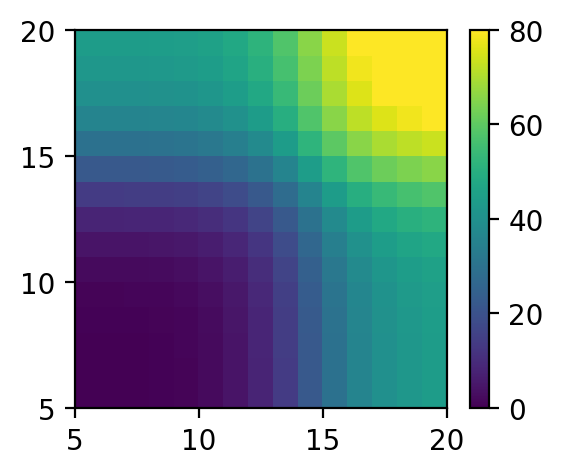

In [871]:
sci = hillN1_seg[-1]
ax = make_plot(sci, True, vmin=0,vmax=80)
ax.set_yticks([5, 10, 15, 20])
ax.set(xlim=(5, 20), ylim=(5, 20))
plt.show()

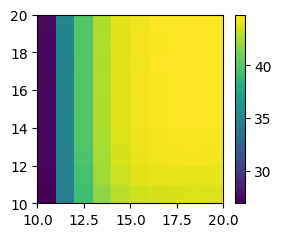

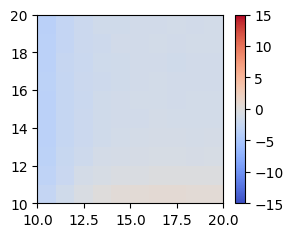

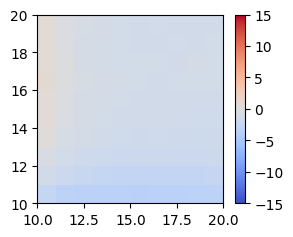

In [924]:
plot_qty(hillT5[0], qty="m1max")
plot_qty_diff(hillT5[0], hillT5_seg[0], qty="m1max", cmap="coolwarm", vmin=-15, vmax=15)
plot_qty_diff(hillT5[0], hillT5_seg[0], qty="m2max", cmap="coolwarm", vmin=-15, vmax=15)


# plot_qty_diff(hillT5[0], hillT5_seg[0], qty="m1max", cmap="coolwarm", vmin=-15, vmax=15)

# plot_qty_diff(hillT5[0], hillT5_seg[0], qty="m2max", cmap="coolwarm", vmin=-15, vmax=15)

prm1= [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
prm2= [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
prm_seg_set [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


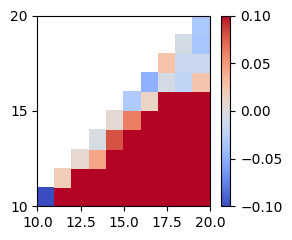

10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

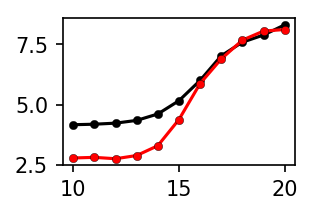

In [898]:
ax = make_diff_plot(hillN1[0],hillN1_seg[0], True, cmap="coolwarm", vmin=-0.1, vmax=0.1)
ax.set(yticks=[10, 15, 20])
# ax.hlines(y=12.6, xmin=5, xmax=20)
# ax.vlines(x=12.6, ymin=5, ymax=20)
plt.tight_layout()
#plt.savefig("figs/hillN5_diagram.pdf", format='pdf')
plt.show()

make_diff_plot_1d(hillN1[0], hillN1_seg[0], 20)


prm1= [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
prm2= [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
prm_seg_set [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


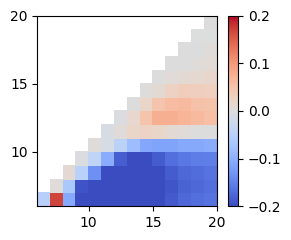

5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

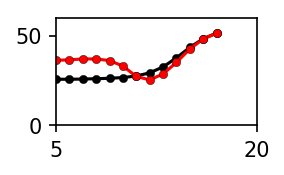

prm1= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
prm2= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
prm_seg_set [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


/home/jhongda/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in double_scalars


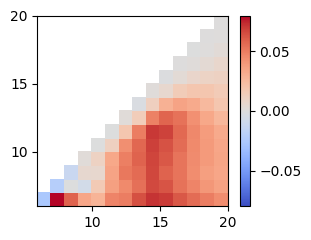

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

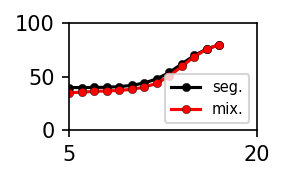

In [921]:
ax = make_diff_plot(hillN5[5],hillN5_seg[5], True, cmap="coolwarm", vmin=-0.2, vmax=0.2)
ax.set(yticks=[10, 15, 20], xlim=(6, 20), ylim=(6, 20))
# ax.hlines(y=12.6, xmin=5, xmax=20)
# ax.vlines(x=12.6, ymin=5, ymax=20)
plt.tight_layout()
#plt.savefig("figs/hillN5_diagram_scaled_v2.pdf", format='pdf')
plt.show()

ax = make_diff_plot_1d(hillN5[5], hillN5_seg[5], 17)
ax.set(ylim=(0, 60), xticks=[5, 20], xlim=(5, 20))

plt.tight_layout()
#plt.savefig("figs/hillN5_1d_nag_tot_Eb17.pdf", format='pdf', transparent=True)
plt.show()
# make_diff_plot(NstepF[3],NstepF_seg[3], True, cmap="coolwarm", vmin=-25, vmax=25)
# #plt.ylim(5, 20)
# ax.set(yticks=[5, 10, 15, 20])
# plt.show()
fig, ax=plt.subplots(figsize=(3.2,2.5), dpi=100)
ax = make_diff_plot(hillT5[3], hillT5_seg[3], True,  ax=ax, cmap="coolwarm", vmin=-0.08, vmax=0.08)
ax.set(yticks=[10, 15, 20], xlim=(6, 20), ylim=(6, 20))

plt.tight_layout()
plt.savefig("figs/hillT5_diagram_scaled_v2.pdf", format='pdf')
plt.show()


ax = make_diff_plot_1d(hillT5[3], hillT5_seg[3], 17)
ax.set(ylim=(0, 100), xticks=[5, 20], xlim=(5, 20))
ax.legend(["seg.", 'mix.'], fontsize=7, loc=4)
plt.tight_layout()
#plt.savefig("figs/hillT5_1d_nag_tot_Eb17.pdf", format='pdf', transparent=True)
plt.show()

prm1= [1]
prm2= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
prm_seg_set [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


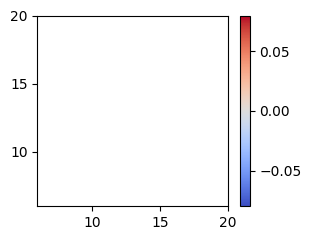

In [932]:
fig, ax=plt.subplots(figsize=(3.2,2.5), dpi=100)
ax = make_diff_plot(hillT1[0], hillT1_seg[0], True,  ax=ax, cmap="coolwarm", vmin=-0.08, vmax=0.08)
ax.set(yticks=[10, 15, 20], xlim=(6, 20), ylim=(6, 20))

plt.tight_layout()
plt.show()

## plot trajectory

In [1027]:
prm = utl.load_prm("output/b_hillT5/base/param.json")
prm_seg = utl.load_prm("output/b_hillT5/base_seg/param.json")
pass
# prm = utl.load_prm("output/a_hillN5/base/param.json")
# prm_seg = utl.load_prm("output/a_hillN5/base_seg/param.json")
pass

def run_sim(prm, prm_seg, eb=20, ed=10, output=False):
    ## mixed antigen
    prm["eb"] = eb
    prm["ed"] = ed
    utl.sync_prm(prm)
    agt0 = sim.Stoch(prm)
    agt0.run()
    agt0.run1()
    
    agt0s = sim.Stoch(prm)
    agt0s.run()
    agt0s.run1()
    
    ### segerated antigen
    prm_seg["eb"] = eb
    prm_seg["ed"] = ed
    utl.sync_prm(prm_seg)
    agt1 = sim.Stoch(prm_seg)
    agt1.run()
    agt1.run1()
    
    
    prm_seg["l0"], prm_seg["l1"] = prm_seg["l1"], prm_seg["l0"]
    utl.sync_prm(prm_seg)
    agt2 = sim.Stoch(prm_seg)
    agt2.run()
    agt2.run1()
    
    prm_seg["l0"], prm_seg["l1"] = prm_seg["l1"], prm_seg["l0"]
    return agt0, agt0s, agt1, agt2

In [1029]:
import AgExtract.model.model3 as sim
from importlib import reload
reload(sim)
import AgExtract.plot as plot

#ag0N, ag0sN, ag1N, ag2N = run_sim(prm, prm_seg, eb=20, ed=7)
#ag0, ag0s, ag1, ag2 = run_sim(prm, prm_seg, eb=20, ed=7)
#bg0, bg0s, bg1, bg2 = run_sim(prm, prm_seg, eb=17, ed=13)
#bg0N, bg0sN, bg1N, bg2N = run_sim(prm, prm_seg, eb=17, ed=13)

cg0, cg0s, cg1, cg2 = run_sim(prm, prm_seg, eb=23, ed=17)

count= 1000||||||||||||||||||99%    
nbar=41.00300, 43.97800, nstd=2.56300, 1.23512, t=87824.73, f=522.098
init condition= [0. 0. 0. 0. 0.]
SSA done!
final spec= [ 0. 41.  0. 45.  0.]
count= 1000||||||||||||||||||99%    
nbar=40.85300, 43.95600, nstd=2.53562, 1.23372, t=87596.60, f=522.190
init condition= [0. 0. 0. 0. 0.]
SSA done!
final spec= [ 0. 42.  0. 43.  0.]
count= 1000||||||||||||||||||99%    
nbar=0.00000, 92.63400, nstd=0.00000, 1.46562, t=88113.72, f=524.420
init condition= [0. 0. 0. 0. 0.]
SSA done!
final spec= [ 0.  0.  0. 94.  0.]
count= 1000||||||||||||||||||99%    
nbar=80.00600, 0.00000, nstd=2.77164, 0.00000, t=87228.93, f=520.132
init condition= [0. 0. 0. 0. 0.]
SSA done!
final spec= [ 0. 83.  0.  0.  0.]


In [1019]:
prm_seg

{'scheme': 'hillN',
 'initCond': 'none',
 'sim_method': 'modified_next_reaction',
 'enzymic_detach': True,
 'force_update': 0,
 'loadSharing': True,
 'beta': 5,
 'mc': 40,
 'f0': 600,
 'tc': 60000.0,
 'vc': 1,
 'tau_a': [300000.07390850753, 300000.07390850753],
 'tau_b': [442413.3920089205, 24154952.7535753],
 'ea': 12.611538,
 'eb': 17,
 'ec': 12.611538,
 'ed': 13,
 'xb1': 1.5,
 'xb2': 2.0,
 'ton': 20000.048949337335,
 'eon': 9.90349,
 'pot': 'phenomenon',
 'l0': 0,
 'l1': 100,
 'tm': 300,
 'tmin': 1000,
 'kf': 0.01,
 'df': 2}

init condition= [0. 0. 0. 0. 0.]
SSA done!
final spec= [ 0.  0.  0. 48.  0.]
init condition= [0. 0. 0. 0. 0.]
SSA done!
final spec= [0. 1. 0. 0. 0.]


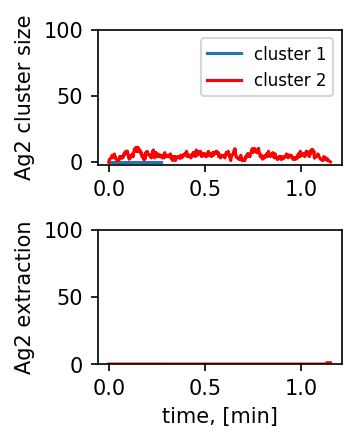

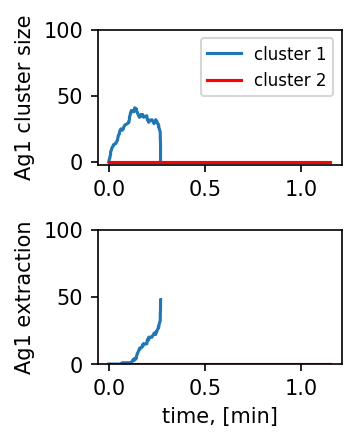

In [994]:
sto1, sto2 = ag1N, ag2N#bg1, bg2
tu = 60000
sto1.run1()
sto2.run1()
fig, axes = plt.subplots(figsize=(2.5, 3), dpi=150, nrows=2)
ax, ax1 = axes[0], axes[1]
ax.set(ylabel="Ag2 cluster size", ylim=(-2, 100))
for sto, ci in zip([sto1, sto2], ["C0", "r"]):
    ax.plot(sto.get_history(qty="t")/tu, sto.get_history("m1"), '-', color=ci)
    ax1.plot(sto.get_history(qty="t")/tu, sto.get_history("m2"), '-', color=ci)

ax1.set(xlabel="time, [min]", ylabel="Ag2 extraction", ylim=(0, 100))
ax.legend(["cluster 1", "cluster 2"], fontsize=8)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(figsize=(2.5, 3), dpi=150, nrows=2)
ax, ax1 = axes[0], axes[1]
for sto, ci in zip([sto1, sto2], ["C0", "r"]):
    ax.plot(sto.get_history(qty="t")/tu, sto.get_history("m3"), ci)
    ax1.plot(sto.get_history(qty="t")/tu, sto.get_history("m4"), ci)
ax.set(ylabel="Ag1 cluster size", ylim=(-2, 100))
ax1.set(xlabel="time, [min]", ylabel="Ag1 extraction", ylim=(0, 100))
ax.legend(["cluster 1", "cluster 2"], fontsize=8)
plt.tight_layout()
plt.show()

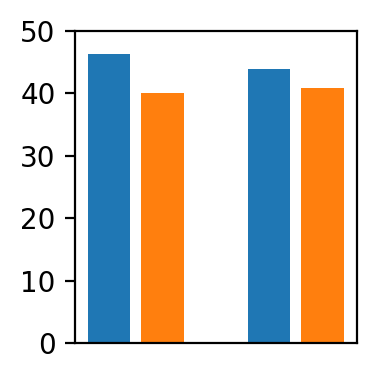

In [1030]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)

## hillT5 23 vs 17
### mixed
plt.bar([4], [(cg0.nbar[3]+cg0s.nbar[3]) / 2], color="C0")
plt.bar([5], [(cg0.nbar[1]+cg0s.nbar[1]) / 2],color="C1")

### segregated
plt.bar([1], [(cg1.nbar[3]+cg2.nbar[3])/2], color="C0")
plt.bar([2], [(cg1.nbar[1]+cg2.nbar[1])/2], color="C1")





# ## hillT5 17 vs 13
# ### mixed
# plt.bar([4], [(bg0.nbar[3]+bg0s.nbar[3]) / 2], color="C0")
# plt.bar([5], [(bg0.nbar[1]+bg0s.nbar[1]) / 2],color="C1")

# ### segregated
# plt.bar([1], [(bg1.nbar[3]+bg2.nbar[3])/2], color="C0")
# plt.bar([2], [(bg1.nbar[1]+bg2.nbar[1])/2], color="C1")


# ## hillN5 17 vs 13
# ### mixed
# plt.bar([4], [(bg0N.nbar[3]+bg0sN.nbar[3]) / 2], color="C0")
# plt.bar([5], [(bg0N.nbar[1]+bg0sN.nbar[1]) / 2],color="C1")

# ### segregated
# plt.bar([1], [(bg1N.nbar[3]+bg2N.nbar[3])/2], color="C0")
# plt.bar([2], [(bg1N.nbar[1]+bg2N.nbar[1])/2], color="C1")




### HillT5, 20 vs 7
# ### mixed
# plt.bar([4], [(ag0.nbar[3]+ag0s.nbar[3]) / 2], color="C0")
# plt.bar([5], [(ag0.nbar[1]+ag0s.nbar[1]) / 2],color="C1")

# ### segregated
# plt.bar([1], [(ag1.nbar[3]+ag2.nbar[3])/2], color="C0")
# plt.bar([2], [(ag1.nbar[1]+ag2.nbar[1])/2], color="C1")

# ### HillN5 20 vs 7
# ### mixed
# plt.bar([4], [(ag0N.nbar[3]+ag0sN.nbar[3]) / 2], color="C0")
# plt.bar([5], [(ag0N.nbar[1]+ag0sN.nbar[1]) / 2],color="C1")

# ### segregated
# plt.bar([1], [(ag1N.nbar[3]+ag2N.nbar[3])/2], color="C0")
# plt.bar([2], [(ag1N.nbar[1]+ag2N.nbar[1])/2], color="C1")

#plt.legend(["Ag1", "Ag2"], fontsize=8)
plt.ylim(0, 50)
plt.xticks([])
plt.tight_layout()
#plt.savefig("figs/HillN5_ntot_comparison_20and7.pdf", format='pdf')
#plt.savefig("figs/HillT5_ntot_comparison_13and17.pdf", format='pdf')
#plt.savefig("figs/HillN5_ntot_comparison_13and17.pdf", format='pdf')
plt.show()

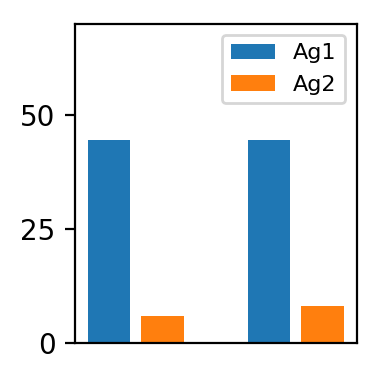

In [999]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)

# plt.bar([4], [(bg0.m2_max+bg0s.m2_max) / 2],color="C0")
# plt.bar([5], [(bg0.m1_max+bg0s.m1_max) / 2],color="C1")
# plt.bar([1], [(bg1.m2_max+bg2.m2_max) / 2], color="C0")
# plt.bar([2], [(bg1.m1_max+bg2.m1_max) / 2], color="C1")

# ## mixed 
# plt.bar([4], [(ag0N.m2_max+ag0sN.m2_max) / 2],color="C0")
# plt.bar([5], [(ag0N.m1_max+ag0sN.m1_max) / 2],color="C1")

# ### segregated
# plt.bar([1], [(ag1N.m2_max+ag2N.m2_max) / 2], color="C0")
# plt.bar([2], [(ag1N.m1_max+ag2N.m1_max) / 2], color="C1")

# # mixed 
# plt.bar([4], [(ag0.m2_max+ag0s.m2_max) / 2],color="C0")
# plt.bar([5], [(ag0.m1_max+ag0s.m1_max) / 2],color="C1")

# ### segregated
# plt.bar([1], [(ag1.m2_max+ag2.m2_max) / 2], color="C0")
# plt.bar([2], [(ag1.m1_max+ag2.m1_max) / 2], color="C1")




plt.legend(["Ag1", "Ag2"], fontsize=8)
plt.ylim(0, 70)
plt.xticks([])
plt.yticks([0, 25, 50])
plt.tight_layout()
#plt.savefig("figs/HillN5_mmax_comparison_20and7.pdf", format='pdf')
plt.show()

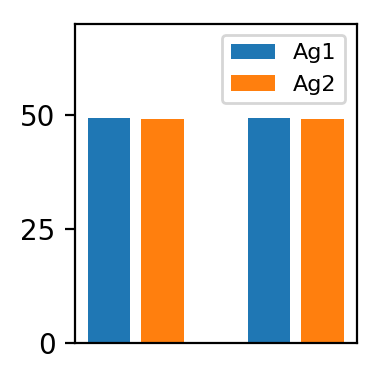

In [1031]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)

## hillT5, 13 vs 17
## mixed
plt.bar([4], [(np.mean(cg0.dataset["m2Tot"]) + np.mean(cg0s.dataset["m2Tot"])) / 2], color="C0")
plt.bar([5], [(np.mean(cg0.dataset["m1Tot"]) + np.mean(cg0s.dataset["m1Tot"])) / 2], color="C1")

### segregated
plt.bar([1], [np.mean(cg1.dataset["m2Tot"]) / 2], color="C0")
plt.bar([2], [np.mean(cg2.dataset["m1Tot"]) / 2], color="C1")



# ## hillT5, 13 vs 17
# ## mixed
# plt.bar([4], [(np.mean(bg0.dataset["m2Tot"]) + np.mean(bg0s.dataset["m2Tot"])) / 2], color="C0")
# plt.bar([5], [(np.mean(bg0.dataset["m1Tot"]) + np.mean(bg0s.dataset["m1Tot"])) / 2], color="C1")

# ### segregated
# plt.bar([1], [np.mean(bg1.dataset["m2Tot"]) / 2], color="C0")
# plt.bar([2], [np.mean(bg2.dataset["m1Tot"]) / 2], color="C1")

# ## hillN5, 13 vs 17
# ## mixed
# plt.bar([4], [(np.mean(bg0N.dataset["m2Tot"]) + np.mean(bg0sN.dataset["m2Tot"])) / 2], color="C0")
# plt.bar([5], [(np.mean(bg0N.dataset["m1Tot"]) + np.mean(bg0sN.dataset["m1Tot"])) / 2], color="C1")

# ### segregated
# plt.bar([1], [np.mean(bg1N.dataset["m2Tot"]) / 2], color="C0")
# plt.bar([2], [np.mean(bg2N.dataset["m1Tot"]) / 2], color="C1")




# ### hillN5, 20 vs 7
# ## mixed
# plt.bar([4], [np.mean(ag0N.dataset["m2Tot"])], color="C0")
# plt.bar([5], [np.mean(ag0N.dataset["m1Tot"])], color="C1")

# ### segregated
# plt.bar([1], [np.mean(ag1N.dataset["m2Tot"]) / 2], color="C0")
# plt.bar([2], [np.mean(ag2N.dataset["m1Tot"]) / 2], color="C1")



# ### mixed
# plt.bar([4], [np.mean(ag0.dataset["m2Tot"])], color="C0")
# plt.bar([5], [np.mean(ag0.dataset["m1Tot"])], color="C1")

# ### segregated
# plt.bar([1], [np.mean(ag1.dataset["m2Tot"]) / 2], color="C0")
# plt.bar([2], [np.mean(ag2.dataset["m1Tot"]) / 2], color="C1")


plt.legend(["Ag1", "Ag2"], fontsize=8)
plt.ylim(0, 70)
plt.xticks([])
plt.yticks([0, 25, 50])
plt.tight_layout()
#plt.savefig("figs/HillN5_mtot_comparison_20and7.pdf", format='pdf')
#plt.savefig("figs/HillT5_mtot_comparison_13and17.pdf", format='pdf')
#plt.savefig("figs/HillN5_mtot_comparison_13and17.pdf", format='pdf')
plt.show()

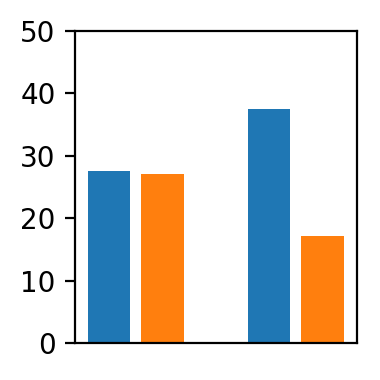

In [1032]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)
### hillT5, 13 vs 17
plt.bar([1], [np.nanmean(cg1.dataset["fb"])], color="C0")
plt.bar([2], [np.nanmean(cg2.dataset["fa"])], color="C1")

plt.bar([4], [np.nanmean(cg0s.dataset["fb"])], color="C0")
plt.bar([5], [np.nanmean(cg0s.dataset["fa"])],color="C1")

# ### hillT5, 13 vs 17
# plt.bar([1], [np.nanmean(bg1.dataset["fb"])], color="C0")
# plt.bar([2], [np.nanmean(bg2.dataset["fa"])], color="C1")

# plt.bar([4], [np.nanmean(bg0s.dataset["fb"])], color="C0")
# plt.bar([5], [np.nanmean(bg0s.dataset["fa"])],color="C1")

# ### hillT5, 13 vs 17
# plt.bar([1], [np.nanmean(bg1N.dataset["fb"])], color="C0")
# plt.bar([2], [np.nanmean(bg2N.dataset["fa"])], color="C1")

# plt.bar([4], [np.nanmean(bg0sN.dataset["fb"])], color="C0")
# plt.bar([5], [np.nanmean(bg0sN.dataset["fa"])],color="C1")



#### HillN5, 20 vs 7
# ### segregated
# plt.bar([1], [np.nanmean(ag1N.dataset["fb"])], color="C0")
# plt.bar([2], [np.nanmean(ag2N.dataset["fa"])], color="C1")

# ### mixed
# plt.bar([4], [np.nanmean(ag0N.dataset["fb"])], color="C0")
# plt.bar([5], [np.nanmean(ag0N.dataset["fa"])],color="C1")


### hillT5, 20 vs 7
# ### segregated
# plt.bar([1], [np.nanmean(ag1.dataset["fb"])], color="C0")
# plt.bar([2], [np.nanmean(ag2.dataset["fa"])], color="C1")

# ### mixed
# plt.bar([4], [np.nanmean(ag0.dataset["fb"])], color="C0")
# plt.bar([5], [np.nanmean(ag0.dataset["fa"])],color="C1")




#plt.legend(["Ag1", "Ag2"], fontsize=8)
plt.ylim(0, 50)
plt.xticks([])
plt.tight_layout()
#plt.savefig("figs/HillN5_fr_comparison_13and17.pdf", format='pdf')
plt.show()

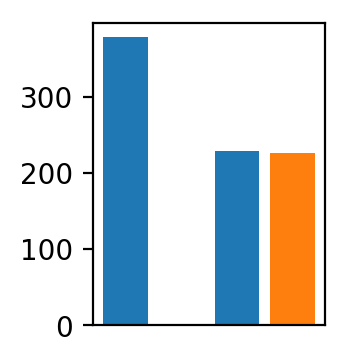

In [993]:
fig, ax = plt.subplots(figsize=(1.5, 2), dpi=200)
plt.bar([1], [np.mean(ag1N.dataset["fr"])], color="C0")
plt.bar([2], [np.mean(ag2N.dataset["fr"])], color="C1")


plt.bar([3], [np.mean(ag0N.dataset["fr"])], color="C0")
plt.bar([4], [np.mean(ag0sN.dataset["fr"])],color="C1")


#plt.legend(["Ag1", "Ag2"], fontsize=8)
#plt.ylim(0, 60)
plt.xticks([])
plt.show()

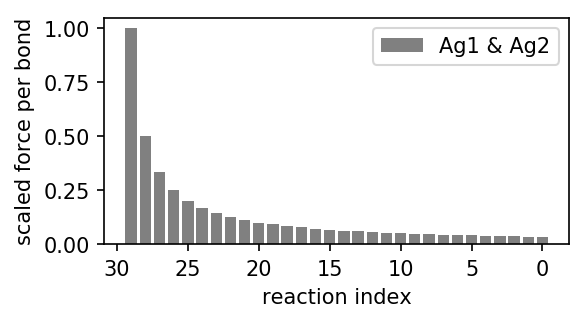

In [516]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
plt.bar(range(1, 31), 1/np.arange(1,31), color='grey')
ax.set(xlabel="reaction index", ylabel="scaled force per bond")
ax.set_xticks(range(0, 31, 5))
ax.set_xticklabels(range(30, -1, -5))
plt.legend(["Ag1 & Ag2"])
plt.show()

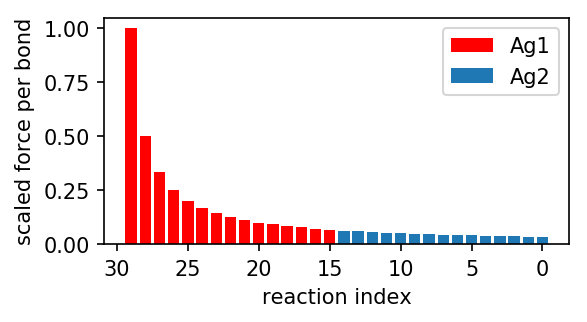

In [515]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
plt.bar(range(1, 16), 1/np.arange(1, 16), color='r')
plt.bar(range(16, 31), 1/np.arange(16, 31))

ax.set(xlabel="reaction index", ylabel="scaled force per bond")
ax.set_xticks(range(0, 31, 5))
ax.set_xticklabels(range(30, -1, -5))
plt.legend(["Ag1", 'Ag2'])
plt.show()

In [942]:
bg1.dataset.keys()

dict_keys(['tr', 'bds', 'fr', 'm1Max', 'm2Max', 'mm', 'mm1', 'mm2', 'mc', 'nc', 'fc', 'nr', 'fa', 'fb', 'm1Tot', 'm2Tot'])

## compare difference and std

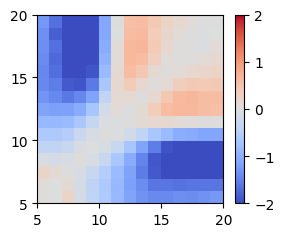

[(5, 20), (5, 20)]

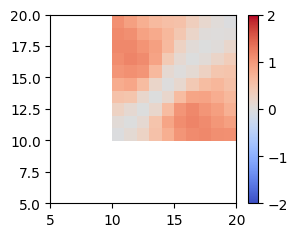

In [777]:
def plot_scaled_diff(sci, sci_seg, ax=None, output=False, **keyargs):
    prm1 = sci.get("prms", True)
    prm2 = sci.get("prms2", True)
    
    prm1_set = list(set(prm1))
    prm2_set = list(set(prm2))
    
    if output:
        print("prm1=", prm1_set)
        print("prm2=", prm2_set)
    length = len(list(set(prm1)))
    nag = sci.get("nag", True) + sci.get("nag_antag", True)
    nstd = np.sqrt(sci.get("nstd", True)**2 + sci.get("nstd_antag", True)**2)
    
    prm_seg = sci_seg.get("prms", True)
    prm_seg_set = list(set(prm_seg))
    
    if output:
        print("prm_seg_set", prm_seg_set)
    nag_seg = sci_seg.get("nag", True)
    
    ret = np.ones((len(prm1_set), len(prm2_set)))*np.nan
    for ni, p1i, p2i, nstdi in zip(nag, prm1, prm2, nstd):
        ret[prm1_set.index(p1i), prm2_set.index(p2i)] = ((nag_seg[prm_seg_set.index(p1i)] + nag_seg[prm_seg_set.index(p2i)])/2 - ni)/nstdi
    if ax is None:
        fig, ax=plt.subplots(figsize=(3,2.5), dpi=100)
    hmap = ax.pcolor(prm2_set, prm1_set,  ret, **keyargs)
    plt.colorbar(hmap)
    return ax
    

ax = plot_scaled_diff(hillN5[5], hillN5_seg[5], cmap="coolwarm", vmin=-2, vmax=2)
ax.set(yticks=[5, 10, 15, 20])
plt.show()

ax = plot_scaled_diff(hillT5[1], hillT5_seg[1], cmap="coolwarm", vmin=-2, vmax=2)
ax.set(xlim=(5, 20), ylim=(5, 20))

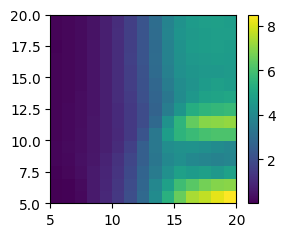

In [704]:
plot_qty(hillN5[5], qty="nstd_antag")

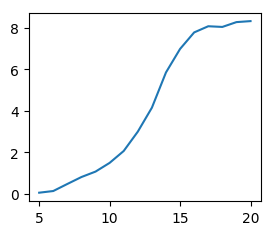

In [709]:
plot_seg_qty(hillN5_seg[5], qty="nstd")

In [703]:
hillN5[5].dataset.keys()

dict_keys(['prms', 'prms2', 'tr', 'tr_std', 'tstd', 'tstd_std', 'fr', 'fr_std', 'fstd', 'fstd_std', 'tr_all', 'tr_all_std', 'nag', 'nag_std', 'nstd', 'nstd_std', 'nag_antag', 'nag_antag_std', 'nstd_antag', 'nstd_antag_std', 'nag_all', 'nag_all_std', 'm2max', 'm2max_std', 'm2mstd', 'm2mstd_std', 'm1max', 'm1max_std', 'm1mstd', 'm1mstd_std', 'mmax', 'mmax_std', 'mmstd', 'mmstd_std', 'm2max_all', 'm2max_all_std', 'tr_most_prob', 'tr_most_prob_std', 'tr_median', 'tr_median_std', 'nag1', 'nag1_std', 'nag2', 'nag2_std', 'nstd1', 'nstd1_std', 'nstd2', 'nstd2_std', 'nag3', 'nag3_std', 'nag4', 'nag4_std', 'nstd3', 'nstd3_std', 'nstd4', 'nstd4_std', 'eb_sens', 'eb_sens_std', 'l0_sens', 'l0_sens_std', 'eb_acc', 'eb_acc_std', 'l0_acc', 'l0_acc_std', 'log_eb_sens', 'log_eb_sens_std', 'log_l0_sens', 'log_l0_sens_std', 'nag0', 'nag0_std', 'fr0', 'fr0_std', 'tr0', 'tr0_std', 'm2max0', 'm2max0_std', 'nstd0', 'nstd0_std', 'fstd0', 'fstd0_std', 'tstd0', 'tstd0_std', 'm2mstd0', 'm2mstd0_std', 'antagN', 'a

## vary mc

In [798]:
varymc = data.load_data(folder="output/g_varymc/", fname=["base"], data_name=["data.json"], temp=False)
varymc_seg = data.load_data(folder="output/g_varymc/", fname=["base_seg", "base_seg2"], data_name=[], temp=True)


[-0.05190188 -0.62366256 -1.14186878 -1.56106205 -1.45260943 -0.47387644
  0.45370188  2.79547904  1.89464353]


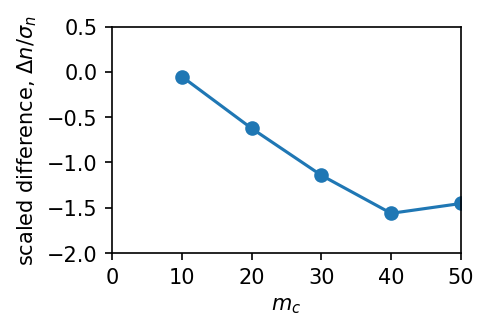

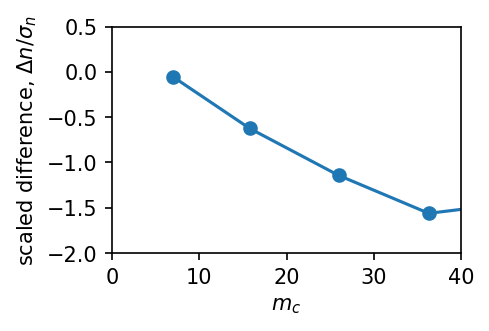

In [822]:
scaled_diff = ( varymc_seg[0].get("ntot", True)+varymc_seg[1].get("ntot", True) - 2*varymc[0].get("ntot", True))/(np.sqrt(2)*np.sqrt(varymc[0].get("nstd", True)**2 + varymc[0].get("nstd_antag", True)**2))
print(scaled_diff)

fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
plt.plot(varymc[0].get("prms", True), scaled_diff, '-o')
# plt.plot(varymc[0].get("prms", True), 2*varymc[0].get("ntot", True), 'o')
# plt.plot(varymc_seg[0].get("prms", True), varymc_seg[0].get("ntot", True), 'o')
# plt.plot(varymc_seg[1].get("prms", True),  varymc_seg[1].get("ntot", True), 'o')
plt.xlim(0, 50)
plt.ylim(-2, 0.5)
ax.set(xlabel="$m_c$", ylabel=r"scaled difference, $\Delta n/\sigma_n$")
plt.show()


fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
plt.plot(varymc[0].get("mmax", True), scaled_diff, '-o')
# plt.plot(varymc[0].get("prms", True), 2*varymc[0].get("ntot", True), 'o')
# plt.plot(varymc_seg[0].get("prms", True), varymc_seg[0].get("ntot", True), 'o')
# plt.plot(varymc_seg[1].get("prms", True),  varymc_seg[1].get("ntot", True), 'o')
plt.xlim(0, 40)
plt.ylim(-2, 0.5)
ax.set(xlabel="$m_c$", ylabel=r"scaled difference, $\Delta n/\sigma_n$")
plt.show()

In [811]:
varymc[0].get("nstd_tot", True)

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [809]:
varymc[0].get("nstd", True)

array([ 1.62984419,  4.71322703,  7.19997265,  6.18708229,  3.45525107,
        1.58948964,  8.84572872, 13.35929618,  3.20491098])

## large L0

In [823]:
largeL0 = data.load_data(folder="output/b_hillT5/", fname=["largeL0"], data_name=[], temp=True)
largeL0_seg = data.load_data(folder="output/b_hillT5/", fname=["largeL0_seg"], data_name=[], temp=True)



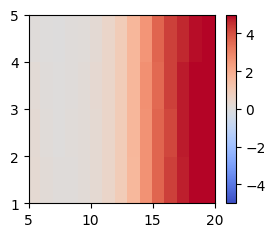

/home/jhongda/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/jhongda/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


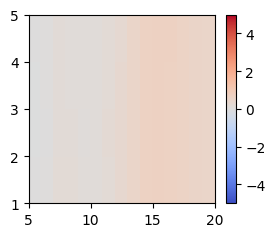

In [839]:
ax = plot_scaled_diff(largeL0[0], largeL0_seg[0], cmap="coolwarm", vmin=-5, vmax=5)
ax.set( ylim=(1, 5), xlim=(5, 20))
plt.show()


ax = plot_scaled_diff(hillT5[3], hillT5_seg[3], cmap="coolwarm", vmin=-5, vmax=5)
ax.set( ylim=(1, 5), xlim=(5, 20))
plt.show()